# **Heart Disease UCI** 


![Cardiovascular Diseases](https://www.who.int/images/default-source/default-album/who-diabetes-vn-ha-nam-who-diabetes-vn-hanoi-dsc07650.tmb-1366v.jpg?sfvrsn=94b9b70a_1%201366w)
[Source](https://www.who.int/health-topics/cardiovascular-diseases/#tab=tab_1)
                         Cardiovascular Diseases

**Key facts:**
- CVDs are the number 1 cause of death globally: more people die annually from CVDs than from any other cause.
- An estimated 17.9 million people died from CVDs in 2016, representing 31% of all global deaths. Of these deaths, 85% are due to heart attack and stroke.
- Over three quarters of CVD deaths take place in low- and middle-income countries.
- Out of the 17 million premature deaths (under the age of 70) due to noncommunicable diseases in 2015, 82% are in low- and middle-income countries, and 37% are caused by CVDs.
- Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.
- People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management using counselling and medicines, as appropriate.
[Source](https://www.who.int/en/news-room/fact-sheets/detail/cardiovascular-diseases-(cvds))

**Some Popular Heart Conditions are:**
- Acute Heart Attack
- Angina
- Atherosclerosis
- Atrial Fibrillation
- Atrial Septal Defect (ASD)
- Cardiac Arrest
- Cardiac Arrhythmia
- Cardiomyopathy
- Chest Pain
- Congenital Heart Disease
- Coronary Artery Disease in Women
- Coronary Bypass Surgery
- Heart Failure
- Patent Ductus Arteriosus
- Rheumatic Fever
- Tetralogy of Fallot
- Ventricular Septal Defect
[Source](https://www.apollohospitals.com/departments/heart/diseases-and-conditions)

# Importing Required Libraries

Here we used some standard libraries like:
- Pandas: pandas is a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for numerical tables and time series. [Source](https://en.wikipedia.org/wiki/Pandas_(software))
- Numpy: NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.[Source](https://en.wikipedia.org/wiki/NumPy)
- Sklearn: Sklearn features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy.[Source](https://en.wikipedia.org/wiki/Scikit-learn)
- XGBoost: XGBoost is an open-source software library which provides a gradient boosting framework for C++, Java, Python, R, Julia, Perl, and Scala. It works on Linux, Windows, and macOS. From the project description, it aims to provide a "Scalable, Portable and Distributed Gradient Boosting Library" [Source](https://en.wikipedia.org/wiki/XGBoost)

In [1]:
import pandas as pd # for data manipulation and analysis
import numpy as np #for numerical computation

#for vizualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Model Building
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


#model Evaluation
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score


# Looking into Data

In [2]:
df = pd.read_csv('../input/heart-disease-uci/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**Features in our data:**
- age
- sex
- chest pain type (4 values)
- resting blood pressure
- serum cholestoral in mg/dl
- fasting blood sugar > 120 mg/dl
- resting electrocardiographic results (values 0,1,2)
- maximum heart rate achieved
- exercise induced angina
- oldpeak = ST depression induced by exercise relative to rest
- the slope of the peak exercise ST segment
- number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

# Exploratary Data Analysis

Exploratory data analysis is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.[Source](https://en.wikipedia.org/wiki/Exploratory_data_analysis)

In [3]:
print('Total number of null values in the dataset are {}'.format(df.isnull().sum().sum()))

Total number of null values in the dataset are 0


In [4]:
print('Our dataset have {} data points and {} features'.format(df.shape[0],df.shape[1]))

Our dataset have 303 data points and 14 features


In [5]:
print('Our target variable have {} % of target 0 and {} % of target 1'.format(round(100*df.target.value_counts(normalize = True)[0],2),round(100*df.target.value_counts(normalize = True)[1],2)))

Our target variable have 45.54 % of target 0 and 54.46 % of target 1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Univariate Analysis

Univariate analysis is perhaps the simplest form of statistical analysis. Like other forms of statistics, it can be inferential or descriptive. The key fact is that only one variable is involved. Univariate analysis can yield misleading results in cases in which multivariate analysis is more appropriate. [Source](https://en.wikipedia.org/wiki/Univariate_analysis)

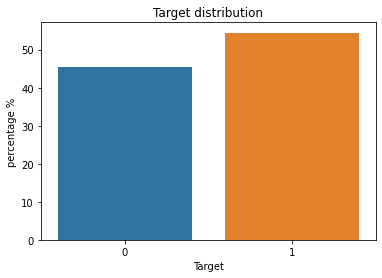

In [8]:
sns.barplot(df.target.value_counts().index,100*df.target.value_counts(normalize = True))
plt.title('Target distribution')
plt.xlabel('Target')
plt.ylabel('percentage %')
plt.show()

From above we can say that it is a balanced dataset

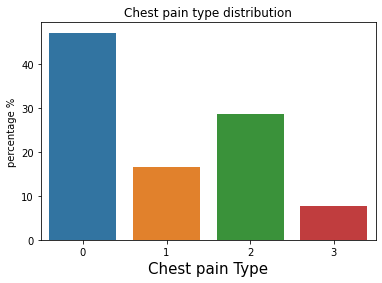

In [9]:
sns.barplot(df.cp.value_counts().index,100*df.cp.value_counts(normalize = True))
plt.title('Chest pain type distribution')
plt.xlabel('Chest pain Type',fontsize = 15)
plt.ylabel('percentage %')
plt.show()

# Bivariate Analysis

Bivariate analysis is one of the simplest forms of quantitative analysis. It involves the analysis of two variables, for the purpose of determining the empirical relationship between them. Bivariate analysis can be helpful in testing simple hypotheses of association.[Source](https://en.wikipedia.org/wiki/Bivariate_analysis)

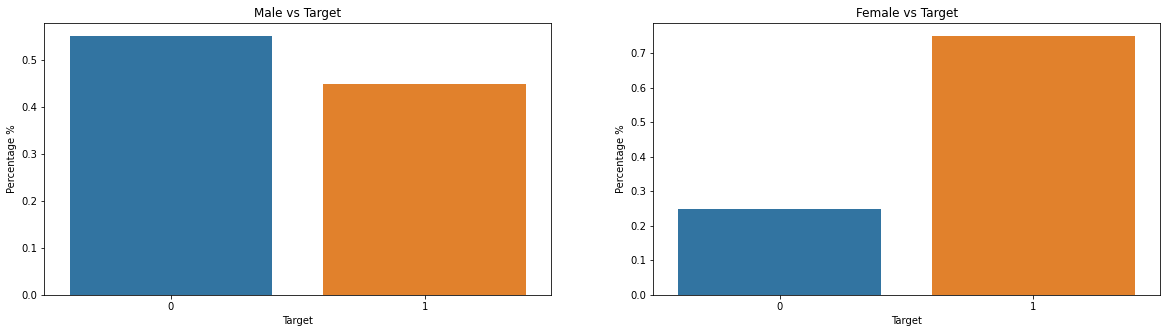

In [10]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.barplot(df[df.sex == 1].target.value_counts().index,df[df.sex == 1].target.value_counts(normalize = True))
plt.xlabel('Target')
plt.ylabel('Percentage %')
plt.title('Male vs Target')
plt.subplot(1,2,2)
sns.barplot(df[df.sex == 0].target.value_counts().index,df[df.sex == 0].target.value_counts(normalize = True))
plt.xlabel('Target')
plt.ylabel('Percentage %')
plt.title('Female vs Target')
plt.show()

**Observaton:** Female have high chances of getting heart attack than Male From above graph

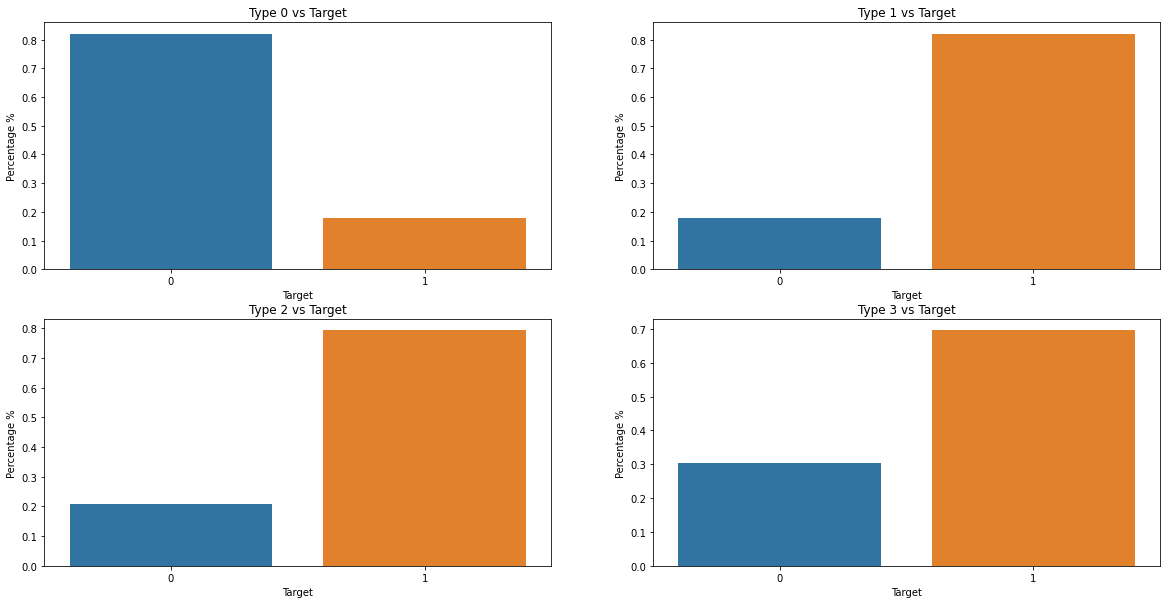

In [11]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.barplot(df[df.cp == 0].target.value_counts().index,df[df.cp == 1].target.value_counts(normalize = True))
plt.xlabel('Target')
plt.ylabel('Percentage %')
plt.title('Type 0 vs Target')
plt.subplot(2,2,2)
sns.barplot(df[df.cp == 1].target.value_counts().index,df[df.cp == 1].target.value_counts(normalize = True))
plt.xlabel('Target')
plt.ylabel('Percentage %')
plt.title('Type 1 vs Target')
plt.subplot(2,2,3)
sns.barplot(df[df.cp == 2].target.value_counts().index,df[df.cp == 2].target.value_counts(normalize = True))
plt.xlabel('Target')
plt.ylabel('Percentage %')
plt.title('Type 2 vs Target')
plt.subplot(2,2,4)
sns.barplot(df[df.cp == 3].target.value_counts().index,df[df.cp == 3].target.value_counts(normalize = True))
plt.xlabel('Target')
plt.ylabel('Percentage %')
plt.title('Type 3 vs Target')
plt.show()

**Observation:** pain type 0 is less sever then pain type 1,2 and 3

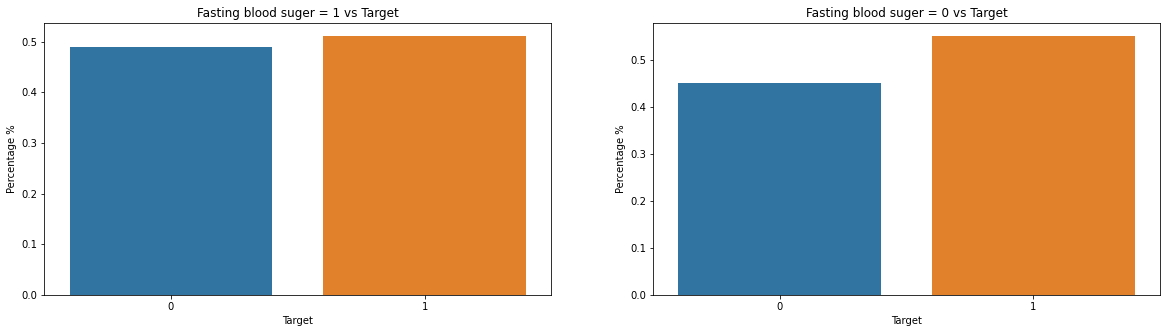

In [12]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.barplot(df[df.fbs == 1].target.value_counts().index,df[df.fbs == 1].target.value_counts(normalize = True))
plt.xlabel('Target')
plt.ylabel('Percentage %')
plt.title('Fasting blood suger = 1 vs Target')
plt.subplot(1,2,2)
sns.barplot(df[df.fbs == 0].target.value_counts().index,df[df.fbs == 0].target.value_counts(normalize = True))
plt.xlabel('Target')
plt.ylabel('Percentage %')
plt.title('Fasting blood suger = 0 vs Target')
plt.show()

**Observation:** fasting blood sugar doesnot have much impact on target

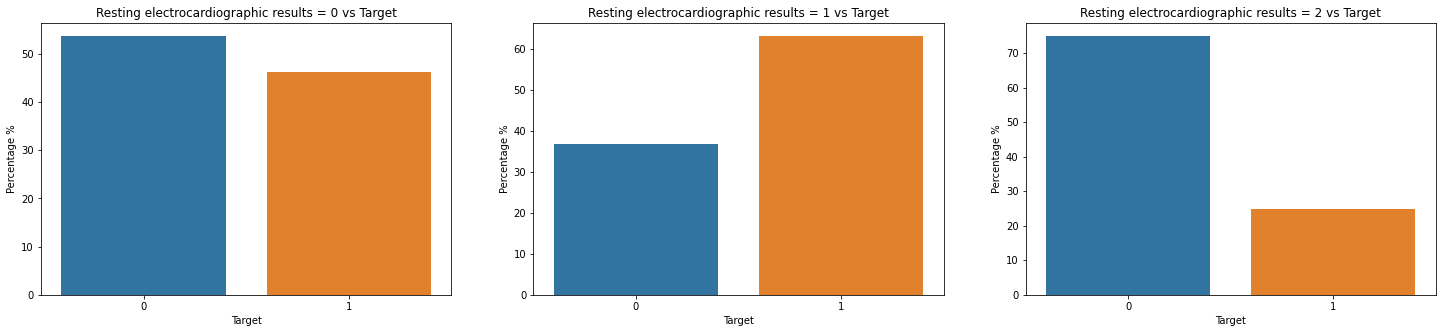

In [13]:
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
sns.barplot(df[df.restecg == 0].target.value_counts().index,100*df[df.restecg == 0].target.value_counts(normalize = True))
plt.xlabel('Target')
plt.ylabel('Percentage %')
plt.title('Resting electrocardiographic results = 0 vs Target')
plt.subplot(1,3,2)
sns.barplot(df[df.restecg == 1].target.value_counts().index,100*df[df.restecg == 1].target.value_counts(normalize = True))
plt.xlabel('Target')
plt.ylabel('Percentage %')
plt.title('Resting electrocardiographic results = 1 vs Target')
plt.subplot(1,3,3)
sns.barplot(df[df.restecg == 2].target.value_counts().index,100*df[df.restecg == 2].target.value_counts(normalize = True))
plt.xlabel('Target')
plt.ylabel('Percentage %')
plt.title('Resting electrocardiographic results = 2 vs Target')
plt.show()

**Observation:** Resting electrocardiographic results = 1 have more chances of taget = 1

# Outlier Analysis

In statistics, an outlier is a data point that differs significantly from other observations. An outlier may be due to variability in the measurement or it may indicate experimental error; the latter are sometimes excluded from the data set. An outlier can cause serious problems in statistical analyses.[Source](https://en.wikipedia.org/wiki/Outlier)

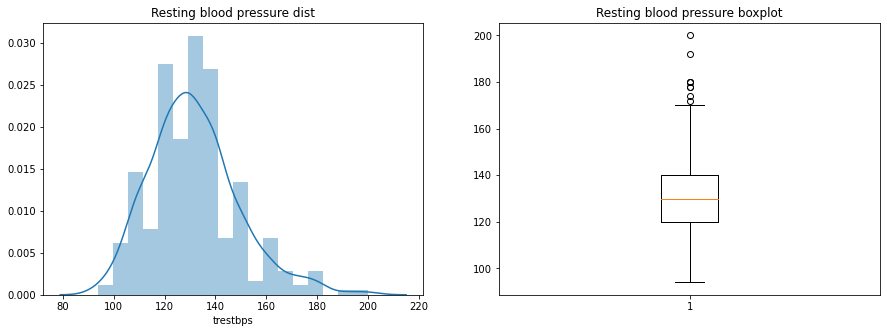

In [14]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(df.trestbps)
plt.title('Resting blood pressure dist')
plt.subplot(1,2,2)
plt.boxplot(df.trestbps)
plt.title('Resting blood pressure boxplot')
plt.show()

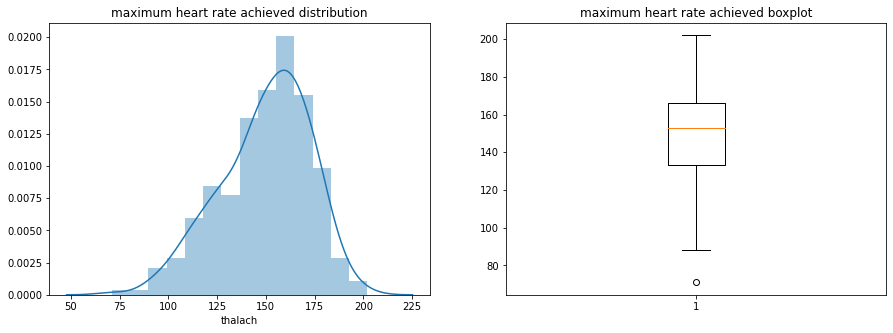

In [15]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(df.thalach)
plt.title('maximum heart rate achieved distribution')
plt.subplot(1,2,2)
plt.boxplot(df.thalach)
plt.title('maximum heart rate achieved boxplot')
plt.show()

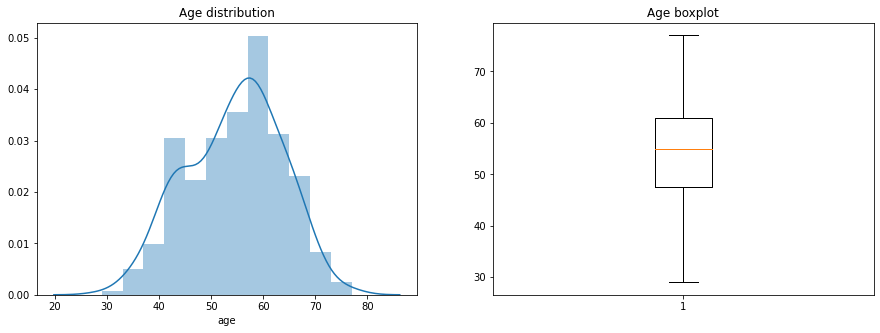

In [16]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(df.age)
plt.title('Age distribution')
plt.subplot(1,2,2)
plt.boxplot(df.age)
plt.title('Age boxplot')
plt.show()

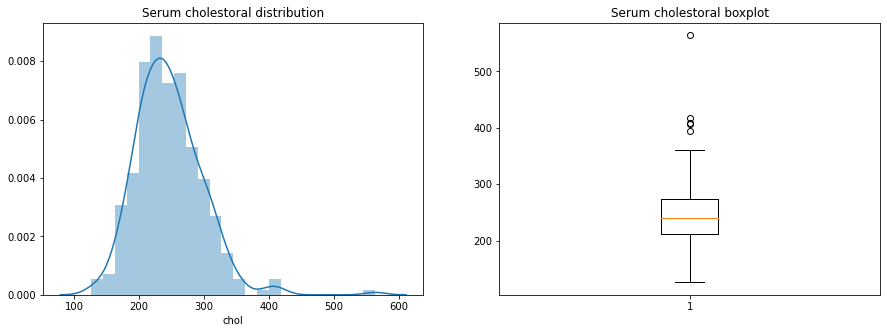

In [17]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(df.chol)
plt.title('Serum cholestoral distribution')
plt.subplot(1,2,2)
plt.boxplot(df.chol)
plt.title('Serum cholestoral boxplot')
plt.show()

# Multivariate Analysis

Multivariate analysis is based on the principles of multivariate statistics, which involves observation and analysis of more than one statistical outcome variable at a time.[Source](https://en.wikipedia.org/wiki/Multivariate_analysis)

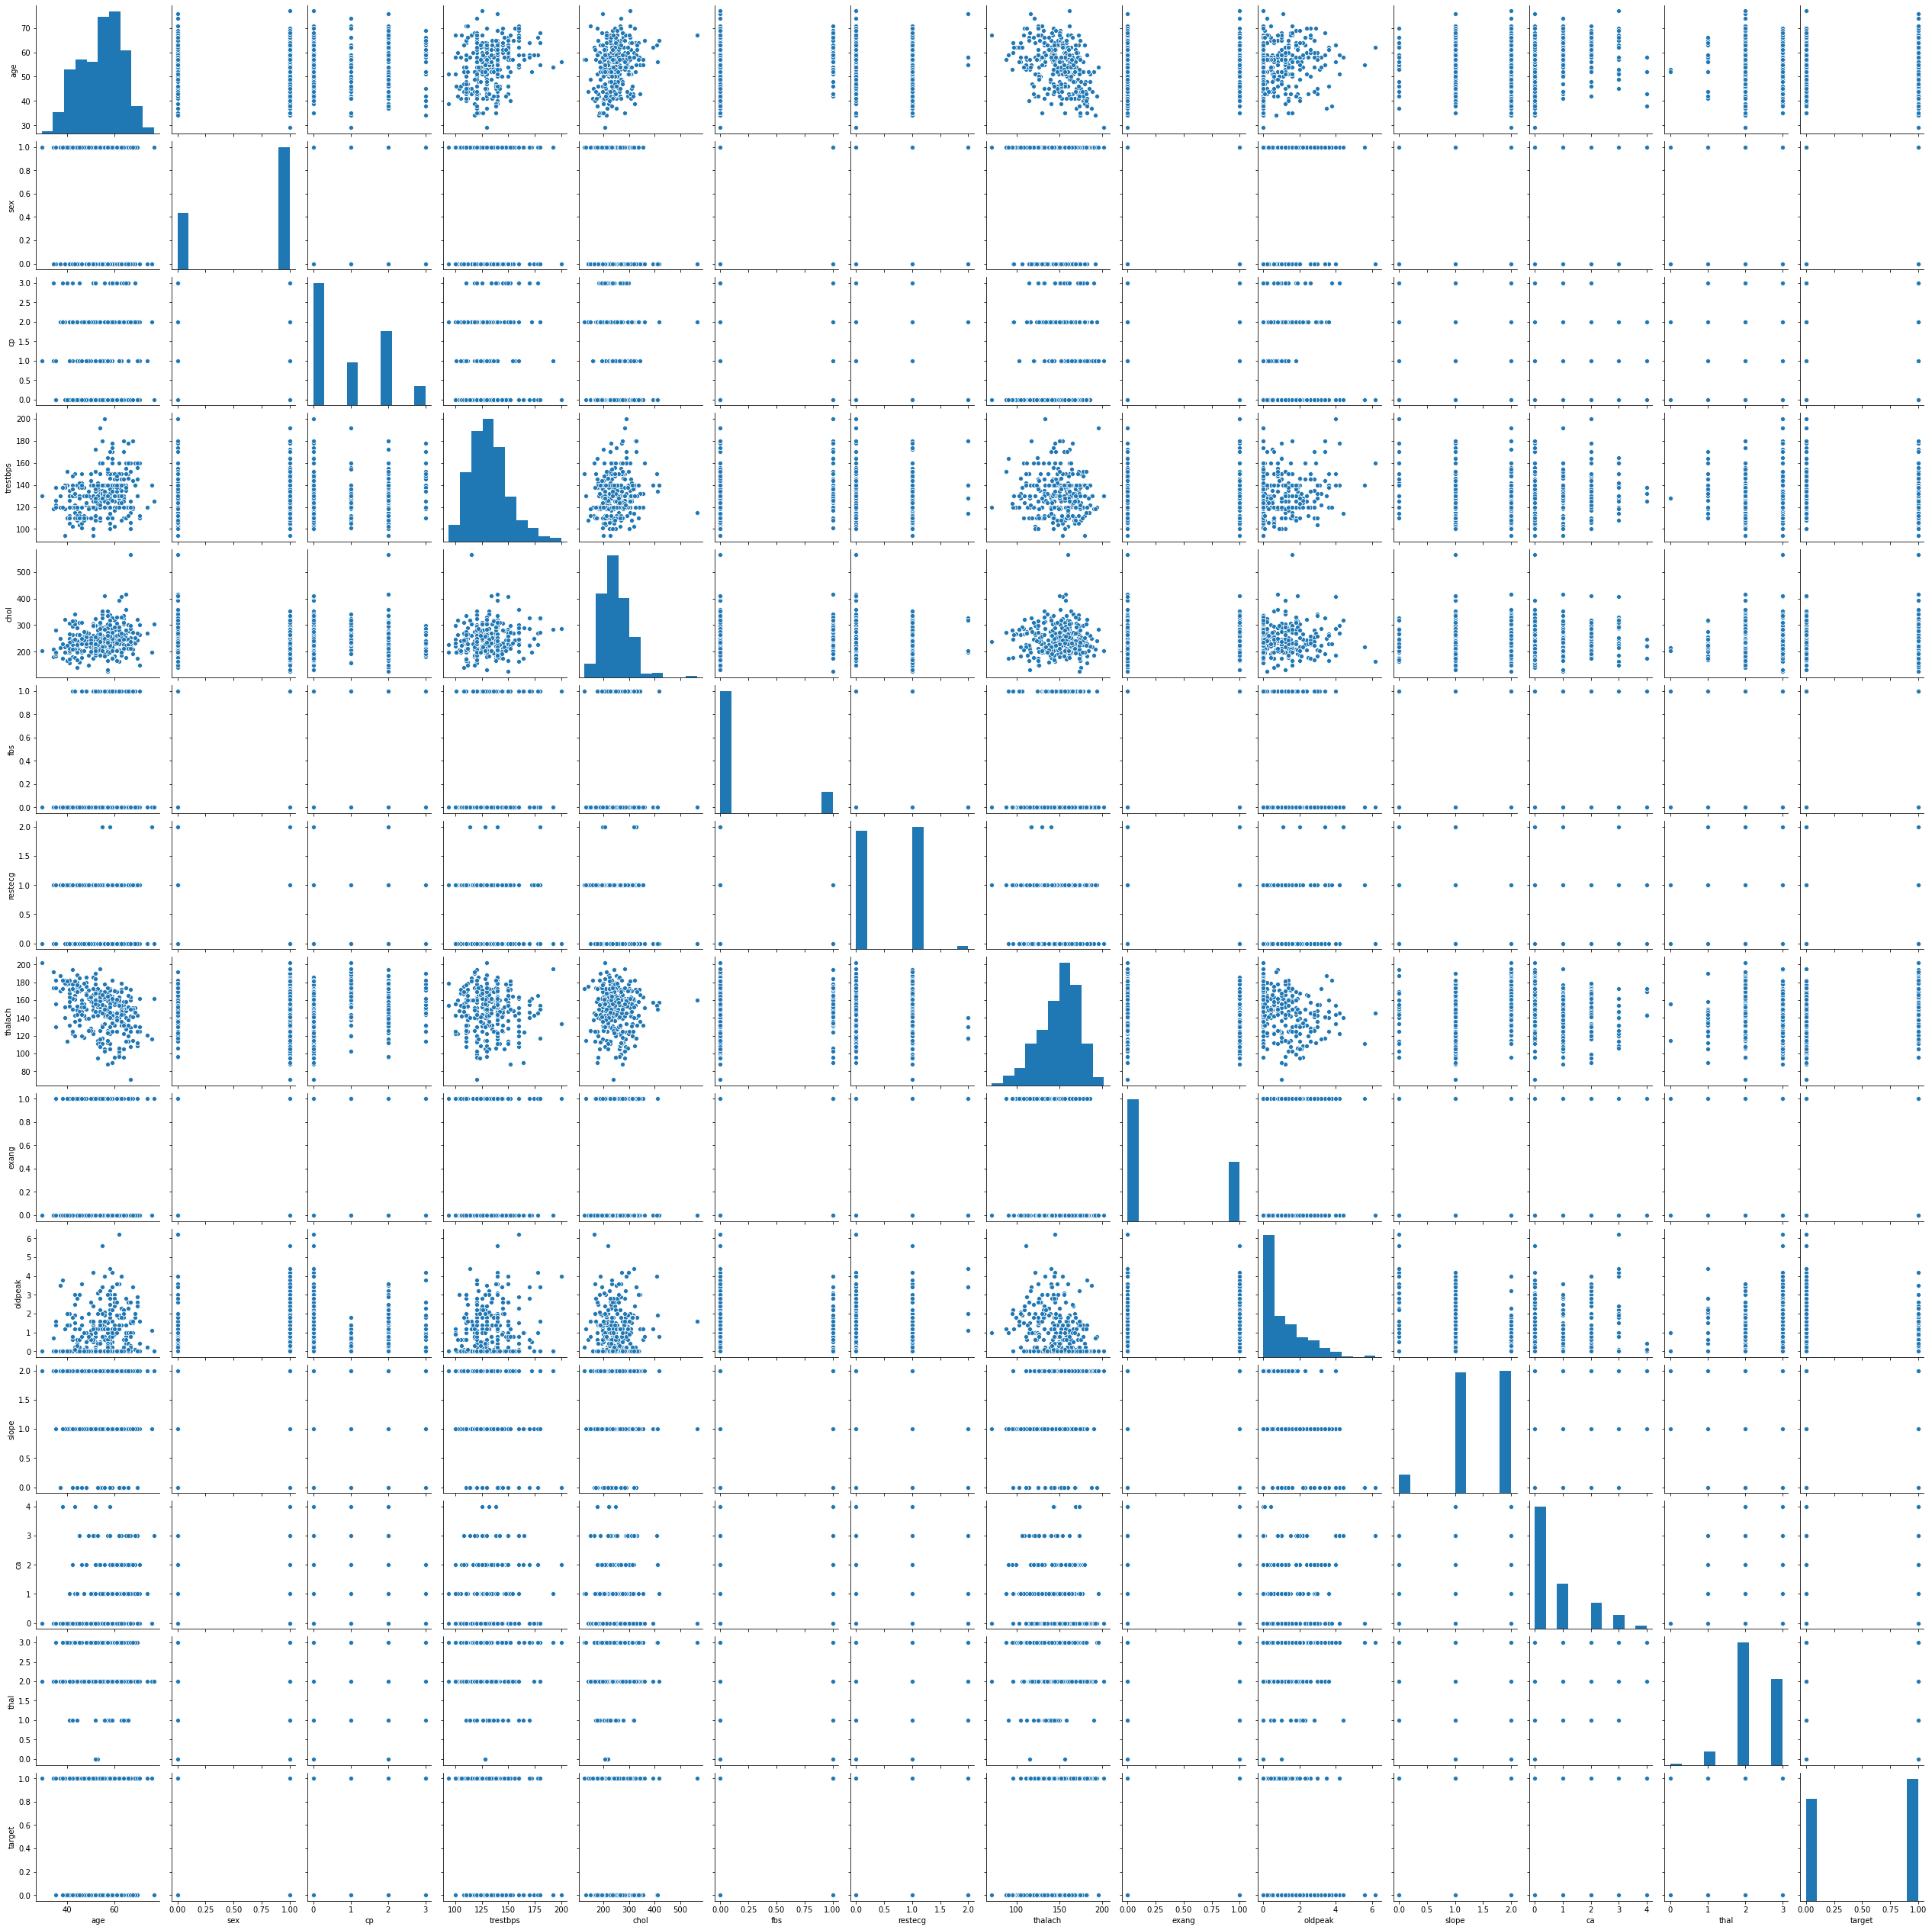

In [18]:
sns.pairplot(df)
plt.show()

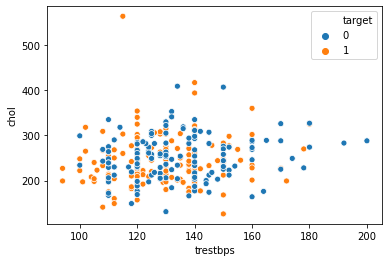

In [19]:
sns.scatterplot(df.trestbps,df.chol,hue=df.target)
plt.show()

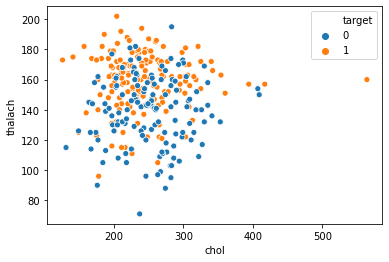

In [20]:
sns.scatterplot(df.chol,df.thalach,hue=df.target)
plt.show()

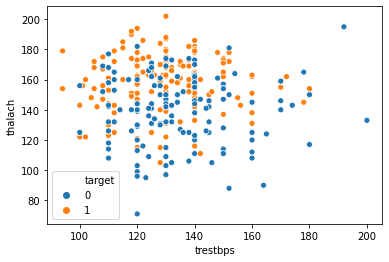

In [21]:
sns.scatterplot(df.trestbps,df.thalach,hue=df.target)
plt.show()

# Correlation Analysis

![Correlation analysis](https://www.gstatic.com/education/formulas2/-1/en/correlation_coefficient_formula.svg)A correlation coefficient is a numerical measure of some type of correlation, meaning a statistical relationship between two variables. The variables may be two columns of a given data set of observations, often called a sample, or two components of a multivariate random variable with a known distribution.[Source](https://en.wikipedia.org/wiki/Correlation_coefficient)

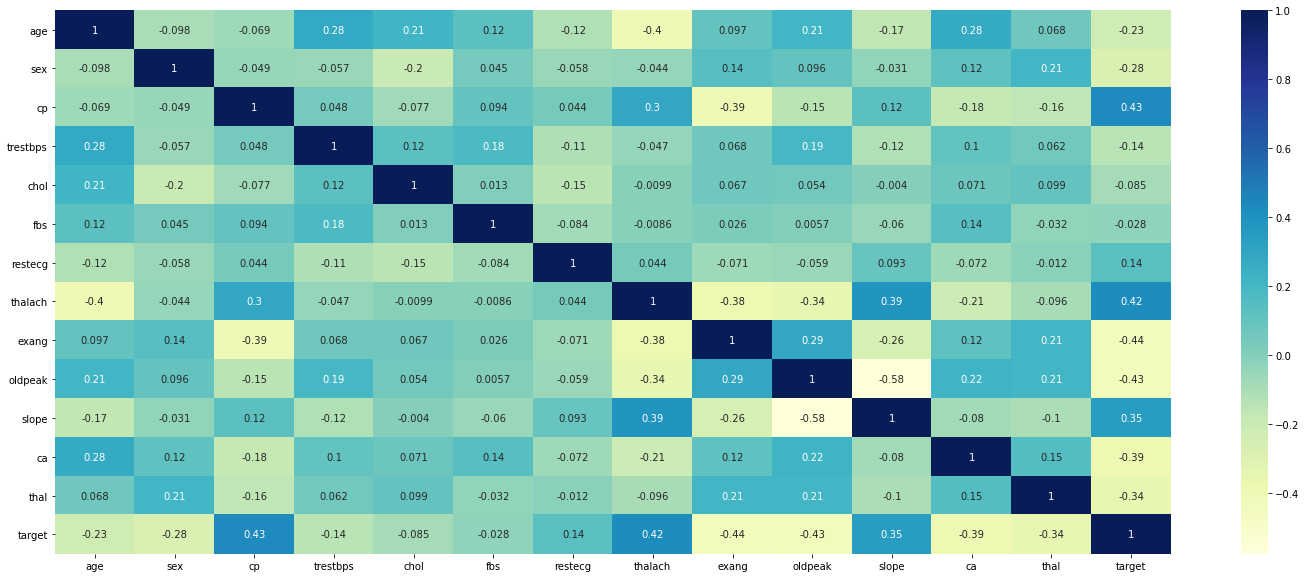

In [22]:
plt.figure(figsize = (25,10))
sns.heatmap(df.corr(),annot=True,cmap = 'YlGnBu')
plt.show()

No strong correlation among our variables

# Splitting data

In [23]:
X = df.drop('target',1)
y = df.target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 2)

In [24]:
X_train.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

# Scaling Data

Min-max scale also known as min-max scaling or min-max normalization, is the simplest method and consists in rescaling the range of features to scale the range in [0, 1] or [−1, 1]. Selecting the target range depends on the nature of the data.[Source](https://en.wikipedia.org/wiki/Feature_scaling#:~:text=Also%20known%20as%20min%2Dmax,the%20nature%20of%20the%20data.)

In [25]:
#scaling the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
X_train = pd.DataFrame(X_train,columns=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach','exang', 'oldpeak', 'slope', 'ca', 'thal'])
X_test = pd.DataFrame(X_test,columns=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach','exang', 'oldpeak', 'slope', 'ca', 'thal'])

In [27]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.500000,1.0,0.666667,0.339623,0.273973,1.0,0.0,0.778626,0.0,0.000000,1.0,0.75,0.666667
1,0.708333,0.0,0.000000,0.283019,0.162100,0.0,0.5,0.496183,1.0,0.000000,0.5,0.00,0.666667
2,0.604167,0.0,0.000000,0.056604,0.278539,0.0,0.0,0.389313,0.0,0.161290,0.5,0.00,0.666667
3,0.250000,0.0,0.333333,0.103774,0.164384,0.0,0.5,0.740458,0.0,0.000000,1.0,0.25,0.666667
4,0.854167,1.0,0.000000,0.339623,0.447489,0.0,0.0,0.290076,0.0,0.387097,0.5,0.75,0.666667


In [28]:
print(X_train.shape)
print(X_test.shape)

(212, 13)
(91, 13)


# Model Buliding and Evaluation

# Logistic Regression

![LR](https://upload.wikimedia.org/wikipedia/commons/thumb/6/6d/Exam_pass_logistic_curve.jpeg/400px-Exam_pass_logistic_curve.jpeg)In statistics, the logistic model is used to model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead or healthy/sick. This can be extended to model several classes of events such as determining whether an image contains a cat, dog, lion, etc.[Source](https://en.wikipedia.org/wiki/Logistic_regression)

In [29]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred_train =lr.predict(X_train)
y_pred_test = lr.predict(X_test)

In [30]:
print('Train Metrics:')
accuracy_train = accuracy_score(y_train,y_pred_train)
con_mat_train = confusion_matrix(y_train,y_pred_train)
f1score_train = f1_score(y_train,y_pred_train)
print(f'Accuracy: {accuracy_train}')
print(f'Confusion matrix:' )
print(con_mat_train)
print(f'F1_score: {f1score_train}')
print('--------------------------------')
print('Test Metrics:')
accuracy_test = accuracy_score(y_test,y_pred_test)
con_mat_test = confusion_matrix(y_test,y_pred_test)
f1score_test = f1_score(y_test,y_pred_test)
print(f'Accuracy: {accuracy_test}')
print(f'Confusion matrix:')
print(con_mat_test)
print(f'F1_score: {f1score_test}')

Train Metrics:
Accuracy: 0.8349056603773585
Confusion matrix:
[[ 75  22]
 [ 13 102]]
F1_score: 0.8535564853556485
--------------------------------
Test Metrics:
Accuracy: 0.8571428571428571
Confusion matrix:
[[31 10]
 [ 3 47]]
F1_score: 0.8785046728971964


# Support Vector Machine

![SVC](https://upload.wikimedia.org/wikipedia/commons/thumb/7/72/SVM_margin.png/300px-SVM_margin.png)In machine learning, support-vector machines are supervised learning models with associated learning algorithms that analyze data for classification and regression analysis.[Source](https://en.wikipedia.org/wiki/Support_vector_machine)

In [31]:
svc = SVC()
svc.fit(X_train,y_train)
y_pred_train =svc.predict(X_train)
y_pred_test = svc.predict(X_test)

In [32]:
print('Train Metrics:')
accuracy_train = accuracy_score(y_train,y_pred_train)
con_mat_train = confusion_matrix(y_train,y_pred_train)
f1score_train = f1_score(y_train,y_pred_train)
print(f'Accuracy: {accuracy_train}')
print(f'Confusion matrix:' )
print(con_mat_train)
print(f'F1_score: {f1score_train}')
print('--------------------------------')
print('Test Metrics:')
accuracy_test = accuracy_score(y_test,y_pred_test)
con_mat_test = confusion_matrix(y_test,y_pred_test)
f1score_test = f1_score(y_test,y_pred_test)
print(f'Accuracy: {accuracy_test}')
print(f'Confusion matrix:')
print(con_mat_test)
print(f'F1_score: {f1score_test}')

Train Metrics:
Accuracy: 0.8820754716981132
Confusion matrix:
[[ 82  15]
 [ 10 105]]
F1_score: 0.8936170212765957
--------------------------------
Test Metrics:
Accuracy: 0.8901098901098901
Confusion matrix:
[[34  7]
 [ 3 47]]
F1_score: 0.9038461538461539


# Decision Tree

![](https://www.explorium.ai/wp-content/uploads/2019/12/Decision-Trees-2.png)A decision tree is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements.[Source](https://en.wikipedia.org/wiki/Decision_tree)

In [33]:
dtc = DecisionTreeClassifier(max_depth=5,min_samples_split=3)
dtc.fit(X_train,y_train)
y_pred_train =dtc.predict(X_train)
y_pred_test = dtc.predict(X_test)

In [34]:
print('Train Metrics:')
accuracy_train = accuracy_score(y_train,y_pred_train)
con_mat_train = confusion_matrix(y_train,y_pred_train)
f1score_train = f1_score(y_train,y_pred_train)
print(f'Accuracy: {accuracy_train}')
print(f'Confusion matrix:' )
print(con_mat_train)
print(f'F1_score: {f1score_train}')
print('--------------------------------')
print('Test Metrics:')
accuracy_test = accuracy_score(y_test,y_pred_test)
con_mat_test = confusion_matrix(y_test,y_pred_test)
f1score_test = f1_score(y_test,y_pred_test)
print(f'Accuracy: {accuracy_test}')
print(f'Confusion matrix:')
print(con_mat_test)
print(f'F1_score: {f1score_test}')

Train Metrics:
Accuracy: 0.9433962264150944
Confusion matrix:
[[ 89   8]
 [  4 111]]
F1_score: 0.9487179487179487
--------------------------------
Test Metrics:
Accuracy: 0.8681318681318682
Confusion matrix:
[[31 10]
 [ 2 48]]
F1_score: 0.888888888888889


# XGBoost

![XGBClassifier](https://d1rwhvwstyk9gu.cloudfront.net/2020/02/XG-Boost-FINAL-01.png)XGBoost provides a wrapper class to allow models to be treated like classifiers or regressors in the scikit-learn framework. This means we can use the full scikit-learn library with XGBoost models. The XGBoost model for classification is called XGBClassifier. Models are fit using the scikit-learn API and the model.[Source](https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/#:~:text=XGBoost%20provides%20a%20wrapper%20class,for%20classification%20is%20called%20XGBClassifier.&text=Models%20are%20fit%20using%20the%20scikit%2Dlearn%20API%20and%20the%20model.)

In [35]:
xgb = XGBClassifier(learning_rate=0.001)
xgb.fit(X_train,y_train)
y_pred_train =xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)

In [36]:
print('Train Metrics:')
accuracy_train = accuracy_score(y_train,y_pred_train)
con_mat_train = confusion_matrix(y_train,y_pred_train)
f1score_train = f1_score(y_train,y_pred_train)
print(f'Accuracy: {accuracy_train}')
print(f'Confusion matrix:' )
print(con_mat_train)
print(f'F1_score: {f1score_train}')
print('--------------------------------')
print('Test Metrics:')
accuracy_test = accuracy_score(y_test,y_pred_test)
con_mat_test = confusion_matrix(y_test,y_pred_test)
f1score_test = f1_score(y_test,y_pred_test)
print(f'Accuracy: {accuracy_test}')
print(f'Confusion matrix:')
print(con_mat_test)
print(f'F1_score: {f1score_test}')

Train Metrics:
Accuracy: 0.9009433962264151
Confusion matrix:
[[ 88   9]
 [ 12 103]]
F1_score: 0.9074889867841409
--------------------------------
Test Metrics:
Accuracy: 0.8461538461538461
Confusion matrix:
[[33  8]
 [ 6 44]]
F1_score: 0.8627450980392156


# Random Forest

![Random Forest](https://miro.medium.com/max/1200/0*YEwFetXQGPB8aDFV)Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes or mean/average prediction of the individual trees.[Source](https://en.wikipedia.org/wiki/Random_forest)

In [37]:
rfc = RandomForestClassifier(max_depth=4,min_samples_split=4)
rfc.fit(X_train,y_train)
y_pred_train =rfc.predict(X_train)
y_pred_test = rfc.predict(X_test)

In [38]:
print('Train Metrics:')
accuracy_train = accuracy_score(y_train,y_pred_train)
con_mat_train = confusion_matrix(y_train,y_pred_train)
f1score_train = f1_score(y_train,y_pred_train)
print(f'Accuracy: {accuracy_train}')
print(f'Confusion matrix:' )
print(con_mat_train)
print(f'F1_score: {f1score_train}')
print('--------------------------------')
print('Test Metrics:')
accuracy_test = accuracy_score(y_test,y_pred_test)
con_mat_test = confusion_matrix(y_test,y_pred_test)
f1score_test = f1_score(y_test,y_pred_test)
print(f'Accuracy: {accuracy_test}')
print(f'Confusion matrix:')
print(con_mat_test)
print(f'F1_score: {f1score_test}')

Train Metrics:
Accuracy: 0.8962264150943396
Confusion matrix:
[[ 81  16]
 [  6 109]]
F1_score: 0.9083333333333333
--------------------------------
Test Metrics:
Accuracy: 0.8901098901098901
Confusion matrix:
[[34  7]
 [ 3 47]]
F1_score: 0.9038461538461539


Here We finalized with Random Forest as our final model Having 
- train accuracy of 88% 
- test accuracy of 91.2% 

# ***Hope You liked this Kernal please upvote if you found it usefull***

#                                ***Thank You*** 